In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import PIL
import tensorflow as tf
import os
import cv2
from sklearn.model_selection import train_test_split

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


# Load Data

In [2]:
path = './flowers'

In [3]:
for file in os.listdir(path):
    print(file)

daisy
dandelion
rose
sunflower
tulip


In [4]:
data = []
targets = [] 


size = (28, 28)

for folder in os.listdir(path):
  for file in os.listdir(os.path.join(path, folder)):
    if file.endswith("jpg"):
      targets.append(folder)

      
      img = cv2.imread(os.path.join(path, folder, file))

      
      img = cv2.resize(img, size)

      
      img = tf.image.rgb_to_grayscale(img)

      data.append(img)
    else:
      continue

# Encode Labels

In [5]:
data = np.array(data)

data = np.squeeze(data)

In [6]:
data = np.array(data).astype("float32") / 255

In [7]:
targets = pd.get_dummies(targets)

In [8]:
targets

,daisy,dandelion,rose,sunflower,tulip
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
4318,0,0,0,0,1
4319,0,0,0,0,1
4320,0,0,0,0,1
4321,0,0,0,0,1


In [9]:
data.shape

(4323, 28, 28)

In [10]:
targets.shape

(4323, 5)

# Split Data

In [11]:
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size = 0.4)

In [12]:
print(train_data.shape)
print(train_targets.shape)
print('#'*10)
print(test_data.shape)
print(test_targets.shape)

(2593, 28, 28)
(2593, 5)
##########
(1730, 28, 28)
(1730, 5)


In [13]:
train_data[0][0]

array([0.26666668, 0.38039216, 0.31764707, 0.44705883, 0.5176471 ,
       0.18431373, 0.14509805, 0.29803923, 0.46666667, 0.50980395,
       0.07058824, 0.60784316, 0.11372549, 0.2509804 , 0.1882353 ,
       0.49019608, 0.3647059 , 0.4392157 , 0.07843138, 0.15686275,
       0.09803922, 0.34901962, 0.3882353 , 0.44705883, 0.3137255 ,
       0.33333334, 0.46666667, 0.47843137], dtype=float32)

In [14]:
train_data = train_data.reshape(2593, 784)
test_data = test_data.reshape(1730, 784)

# Create Model

In [15]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(512, activation='relu', input_shape = (28*28,)))

model.add(tf.keras.layers.Dense(256, activation='relu'))

# model.add(tf.keras.layers.Dense(128, activation='relu'))

# model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(5, activation='softmax'))

# Compile Model

In [16]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Training Model

In [17]:
history = model.fit(train_data, train_targets, epochs=50, validation_split=0.25)

Epoch 1/50
61/61 [==============================] - 2s 16ms/step - loss: 1.7602 - accuracy: 0.2428 - val_loss: 1.7601 - val_accuracy: 0.2789
Epoch 2/50
61/61 [==============================] - 1s 12ms/step - loss: 1.5531 - accuracy: 0.2850 - val_loss: 1.5185 - val_accuracy: 0.3313
Epoch 3/50
61/61 [==============================] - 1s 11ms/step - loss: 1.5084 - accuracy: 0.3249 - val_loss: 1.5293 - val_accuracy: 0.2943
Epoch 4/50
61/61 [==============================] - 1s 12ms/step - loss: 1.5254 - accuracy: 0.2954 - val_loss: 1.5335 - val_accuracy: 0.3128
Epoch 5/50
61/61 [==============================] - 1s 11ms/step - loss: 1.4998 - accuracy: 0.3068 - val_loss: 1.5273 - val_accuracy: 0.3097
Epoch 6/50
61/61 [==============================] - 1s 12ms/step - loss: 1.4978 - accuracy: 0.3229 - val_loss: 1.6881 - val_accuracy: 0.2280
Epoch 7/50
61/61 [==============================] - 1s 12ms/step - loss: 1.5028 - accuracy: 0.2982 - val_loss: 1.5650 - val_accuracy: 0.3035
Epoch 8/50
61

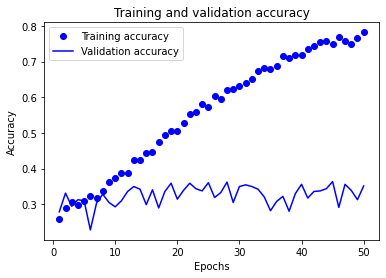

In [18]:
import matplotlib.pyplot as plt
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Final Model

model starts overfitting after 9 epochs

In [19]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(512, activation='relu', input_shape = (28*28,)))

model.add(tf.keras.layers.Dense(256, activation='relu'))

# model.add(tf.keras.layers.Dense(128, activation='relu'))

# model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(5, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_targets, epochs=9, validation_split=0.25)

Epoch 1/9
61/61 [==============================] - 2s 15ms/step - loss: 1.8141 - accuracy: 0.2227 - val_loss: 1.5662 - val_accuracy: 0.3020
Epoch 2/9
61/61 [==============================] - 1s 12ms/step - loss: 1.5503 - accuracy: 0.2865 - val_loss: 1.5749 - val_accuracy: 0.2635
Epoch 3/9
61/61 [==============================] - 1s 11ms/step - loss: 1.5352 - accuracy: 0.2963 - val_loss: 1.5130 - val_accuracy: 0.3097
Epoch 4/9
61/61 [==============================] - 1s 11ms/step - loss: 1.5233 - accuracy: 0.3030 - val_loss: 1.5451 - val_accuracy: 0.3066
Epoch 5/9
61/61 [==============================] - 1s 11ms/step - loss: 1.5134 - accuracy: 0.3039 - val_loss: 1.5366 - val_accuracy: 0.3344
Epoch 6/9
61/61 [==============================] - 1s 11ms/step - loss: 1.4793 - accuracy: 0.3265 - val_loss: 1.5767 - val_accuracy: 0.2789
Epoch 7/9
61/61 [==============================] - 1s 11ms/step - loss: 1.4587 - accuracy: 0.3383 - val_loss: 1.4966 - val_accuracy: 0.3236
Epoch 8/9
61/61 [===

# Evaluation

In [20]:
model.evaluate(test_data, test_targets)

55/55 [==============================] - 0s 3ms/step - loss: 1.5364 - accuracy: 0.3179


[1.5363718271255493, 0.3179190754890442]

# Prediction

In [21]:
model.predict(test_data)

array([[0.01368054, 0.0660162 , 0.12052592, 0.5031279 , 0.2966495 ],
       [0.19349419, 0.22618763, 0.15849036, 0.20361868, 0.21820916],
       [0.20937473, 0.20208032, 0.16941252, 0.21380886, 0.20532353],
       ...,
       [0.19027647, 0.31201297, 0.35022974, 0.01479776, 0.1326831 ],
       [0.19116533, 0.3860358 , 0.16517146, 0.04163489, 0.21599254],
       [0.20573135, 0.29395077, 0.16271013, 0.13042873, 0.20717902]],
      dtype=float32)